In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U scikit-learn mlxtend


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load files
path="/content/SampleSubmission (1).csv"
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv(path)


In [ ]:
train

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,ID_XJWM9B7X4L,26.769658,6965.281426,25.0,0.155955,1.497184,0.000000,252.525113,589.072219,0.858386,0.758573,0.019962,0.0,1177.825039,30.875026,1
8904,ID_YIC5VRPLUD,0.000000,0.000000,27.0,0.000000,0.400009,0.000000,28.089513,27.267273,0.400009,0.355563,0.000000,0.0,221.249363,23.503856,0
8905,ID_T3RF72SEG1,0.866827,853.957842,29.0,0.000000,4.378587,0.000000,20.559356,26.093712,0.333395,0.355621,0.022226,0.0,262.270699,21.060478,0
8906,ID_2AUQFJYWKV,0.044430,16.527885,28.0,0.000000,0.888596,0.000000,74.375484,116.650437,0.555372,0.377653,0.000000,0.0,268.222697,24.775056,0


In [ ]:
# Preview test dataset
test

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,1.211241e+05,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2.029713e+03,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3.888551e+03,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5.581325e+03,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,1.766345e+02,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,ID_PAWIH292SB,7.290908,3.276107e+03,27.000000,0.034732,0.755765,0.000000,66.596217,60.416728,0.955820,0.866907,0.000000,0.0,332.647660,28.937109
3814,ID_EMPXLFEHRN,12.336515,2.539813e+04,42.000000,1.528201,17.115526,1.244766,1401.005811,17492.334080,8.535535,17.737909,0.955802,0.0,15087.869440,28.098248
3815,ID_437MU86JLQ,4.754111,1.123303e+03,30.000000,0.000000,1.932746,0.000000,48.518591,28.702390,0.533171,0.377663,0.044431,0.0,370.087546,31.630495
3816,ID_TMGB3DFDLX,271.668446,3.287590e+06,33.000000,9.429024,11.242224,1.720977,2277.276675,107508.960100,18.371984,81.623461,0.245854,0.0,8097.574777,27.496611


In [ ]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_VT5SH34X8O,0
1,ID_4RQRV7XN3E,0
2,ID_1XCH999D2E,0
3,ID_J2ZBZIO0RW,0
4,ID_KG3PE5VXCN,0


In [ ]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


In [ ]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [ ]:
#checking if there are categorical values in my data
train.dtypes 

ID                           object
I/O Data Operations         float64
 I/O Data Bytes             float64
Number of subprocesses      float64
Time on processor           float64
Disk Reading/sec            float64
Disc Writing/sec            float64
Bytes Sent/sent             float64
Received Bytes (HTTP)       float64
Network packets sent        float64
Network packets received    float64
Pages Read/sec              float64
Pages Input/sec             float64
Page Errors/sec             float64
Confirmed byte radius       float64
Label                         int64
dtype: object

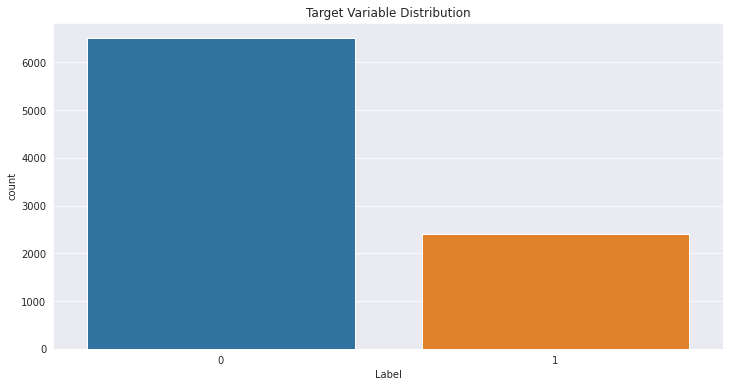

In [ ]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

In [ ]:
# checking for outliers in  training dataset
#sns.pairplot(train, diag_kind='hist')

# Show the plot
#plt.show()

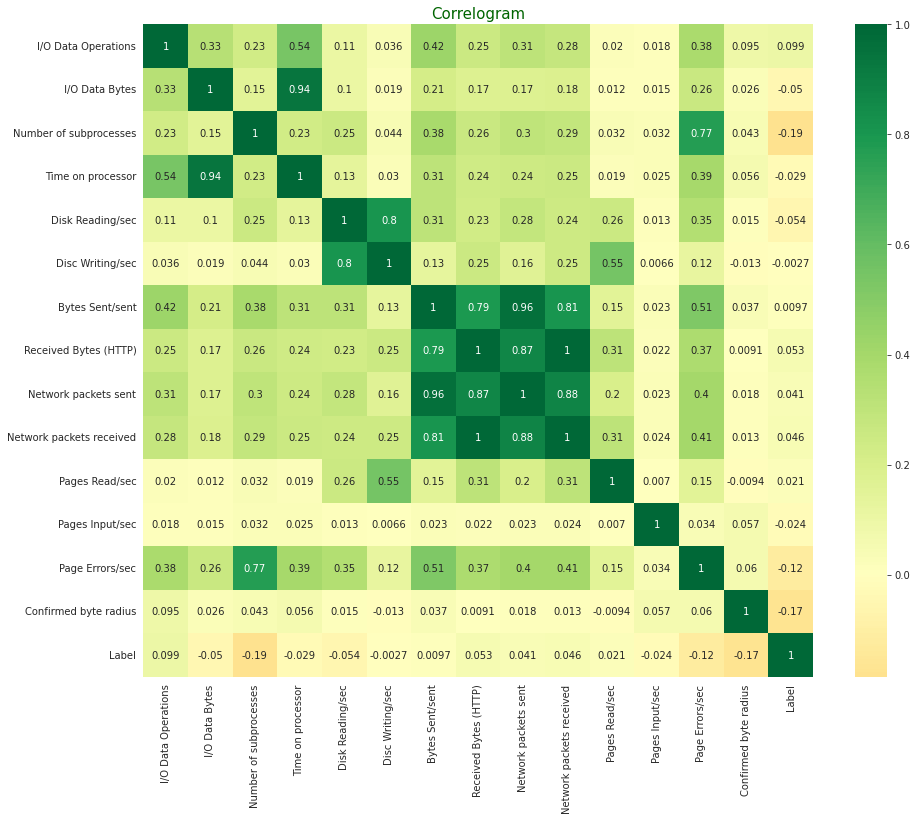

In [ ]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [ ]:
# Calculate the correlation between the features and the target
corr_matrix = corr
corr_with_target = abs(corr_matrix['Label'])

# Select the top 13 features with the highest correlation
k = 13
top_k_features = corr_with_target.nlargest(k).index
# Drop the features that are not selected
selected_features_df = train.loc[:, top_k_features]

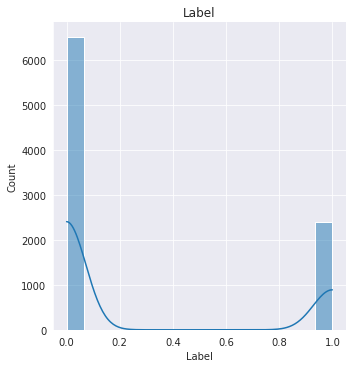

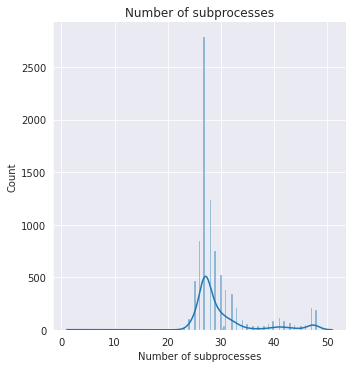

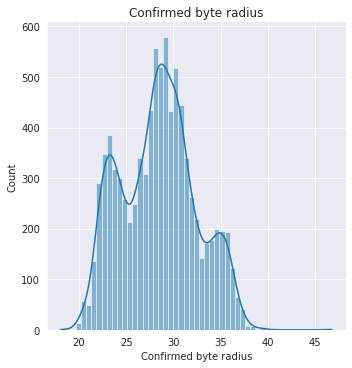

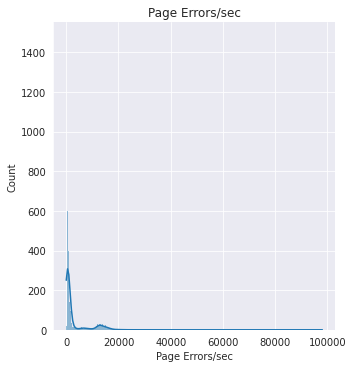

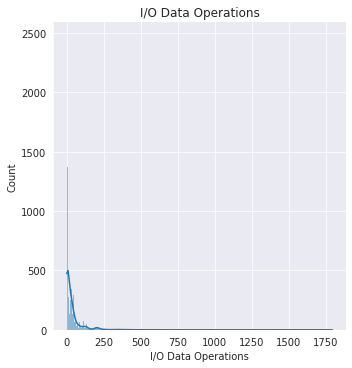

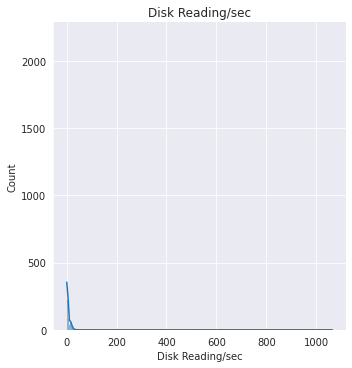

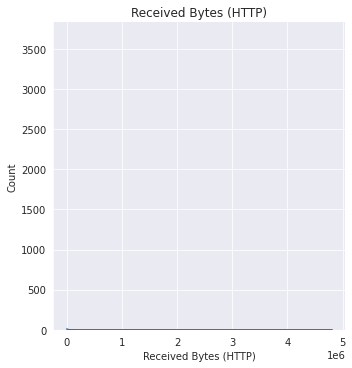

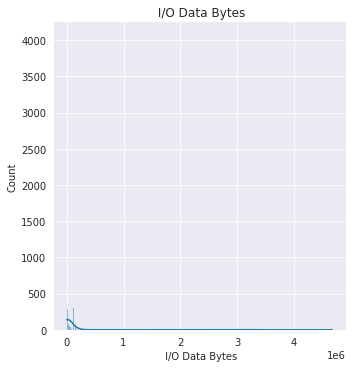

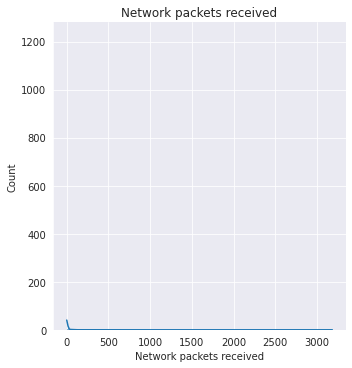

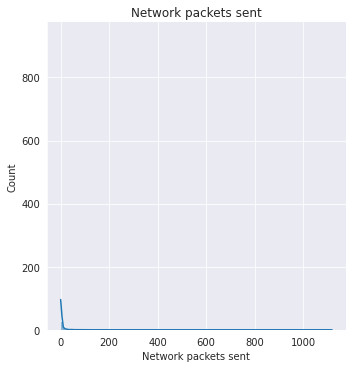

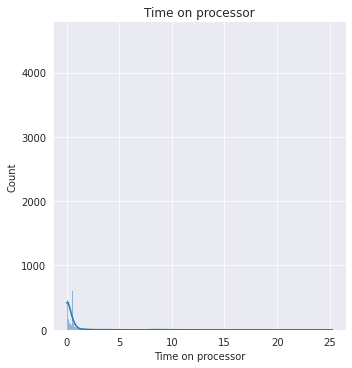

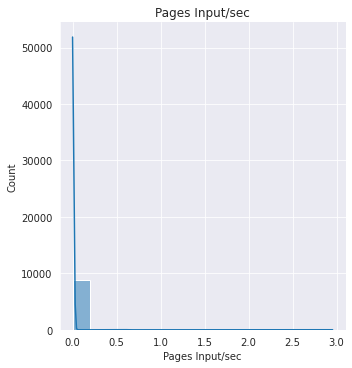

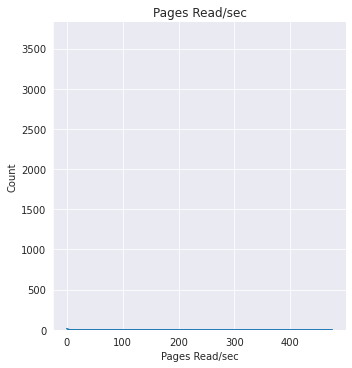

In [ ]:
for column in selected_features_df.columns:
    if selected_features_df[column].dtype != 'object':
        sns.displot(selected_features_df[column], kde=True)
        plt.title(column)
        plt.show()


In [ ]:
from scipy.stats import boxcox
# Loop through all columns in the dataset
for col in selected_features_df.columns:

    # Check if the column is numerical
    if selected_features_df[col].dtype in ['int64', 'float64']:

        # Compute skewness of the column
        skewness = selected_features_df[col].skew()

        # Apply Box-Cox transformation if skewness is greater than 0.5
        if abs(skewness) > 0.5:
            selected_features_df['boxcox_' + col], _ = boxcox(selected_features_df[col] + 1)  # add 1 to avoid negative values

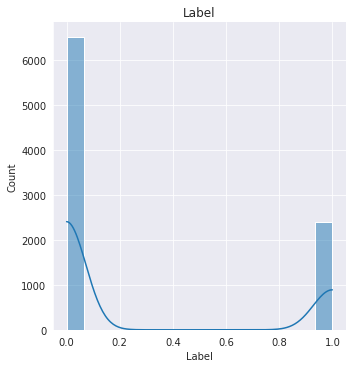

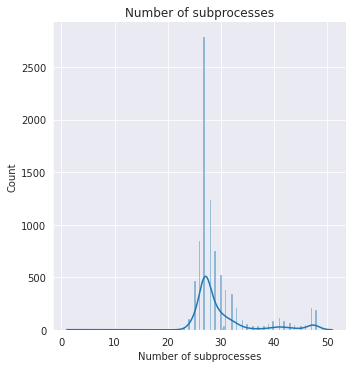

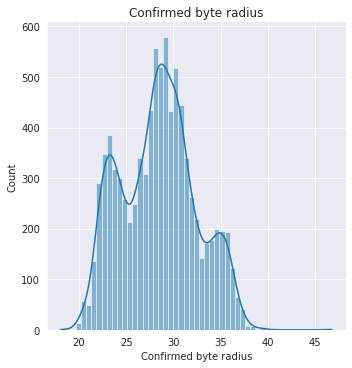

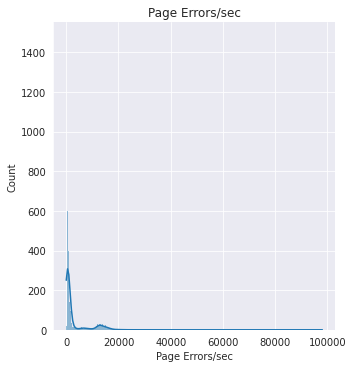

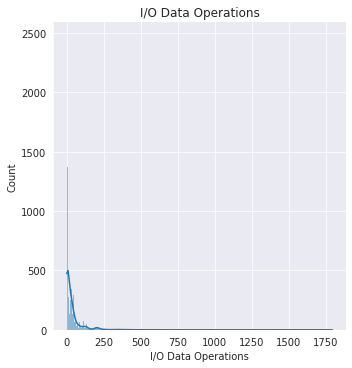

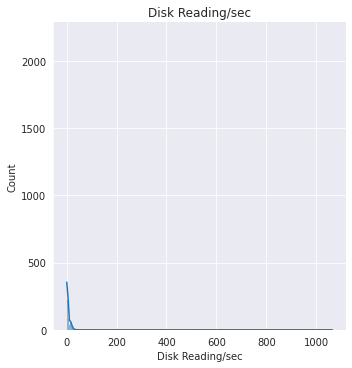

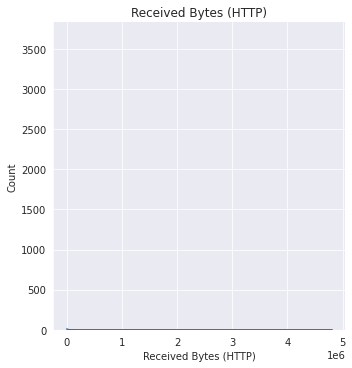

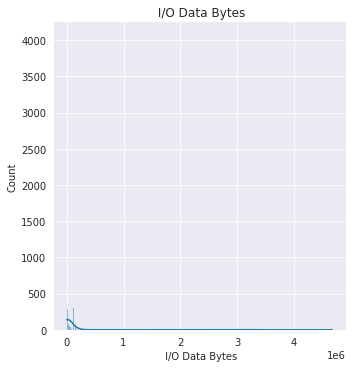

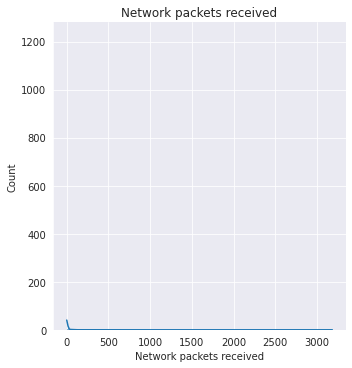

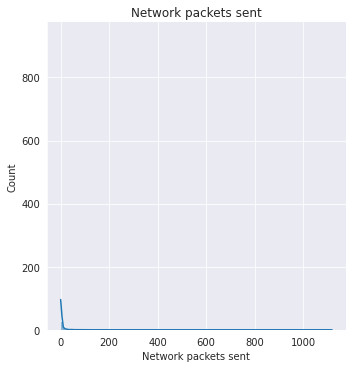

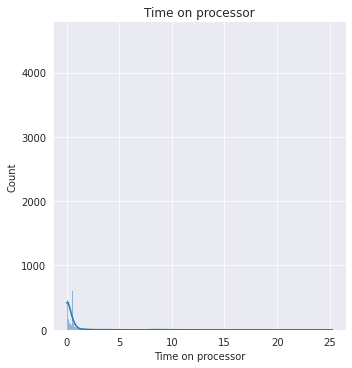

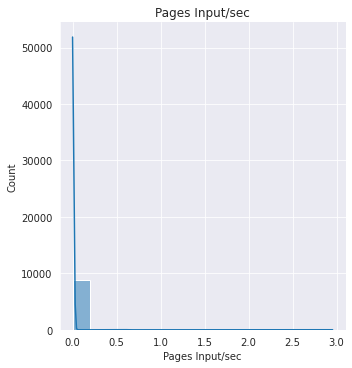

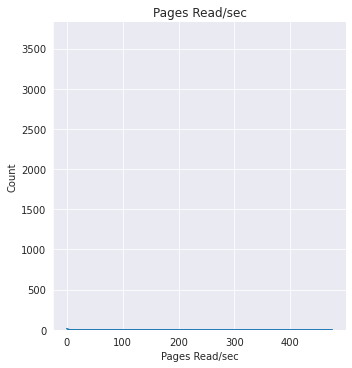

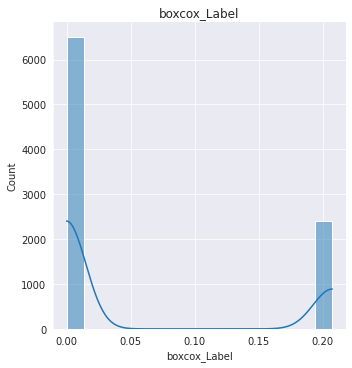

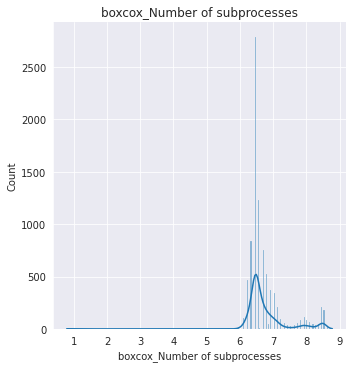

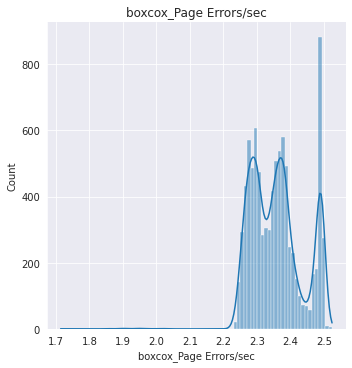

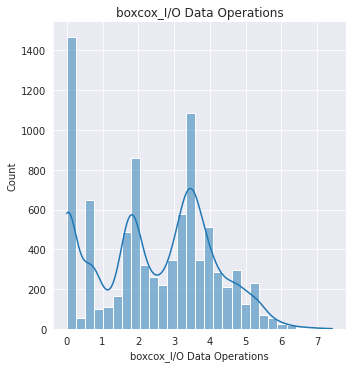

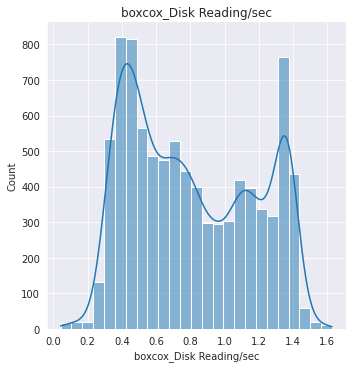

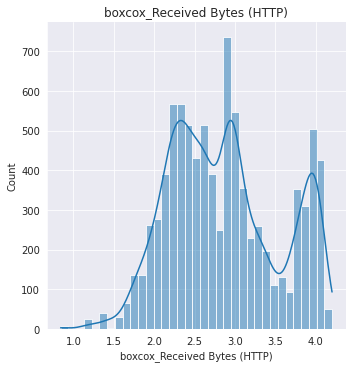

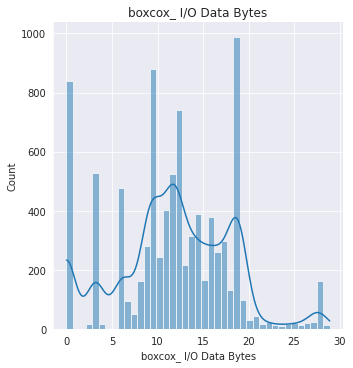

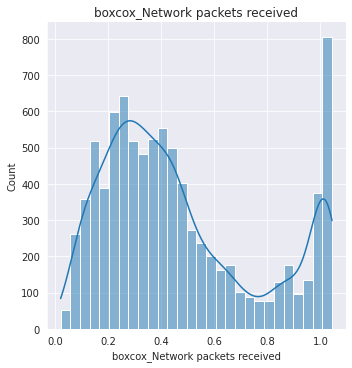

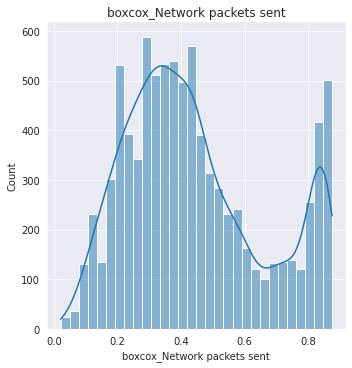

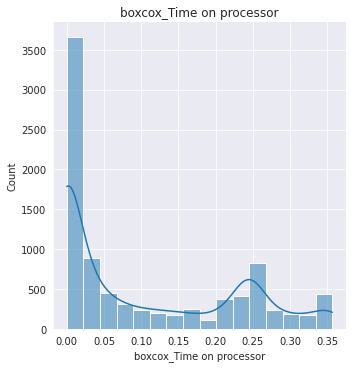

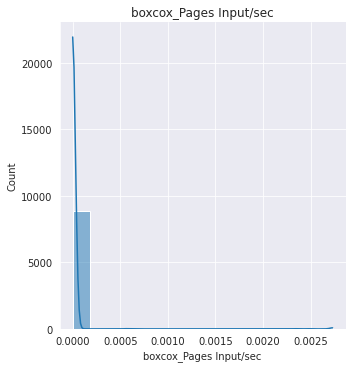

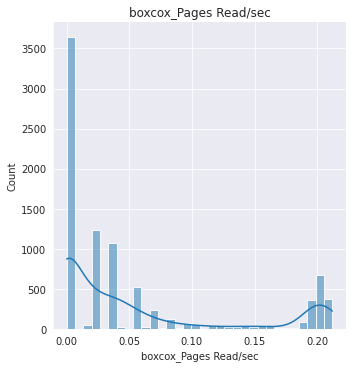

In [ ]:
for column in selected_features_df.columns:
    if selected_features_df[column].dtype != 'object':
        sns.displot(selected_features_df[column], kde=True)
        plt.title(column)
        plt.show()


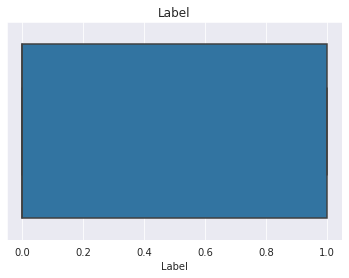

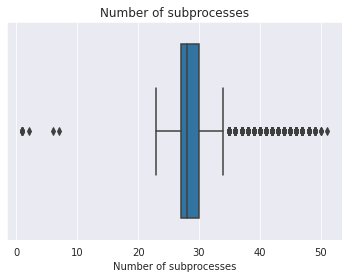

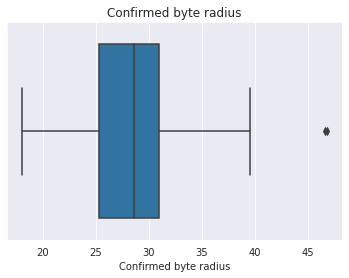

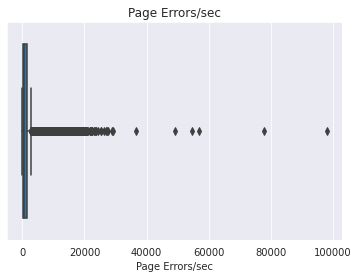

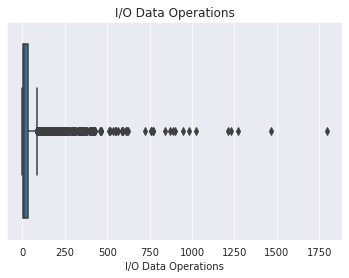

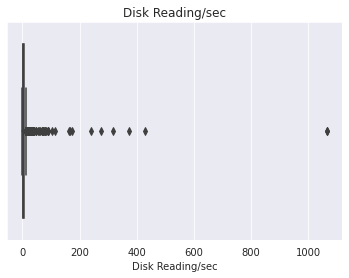

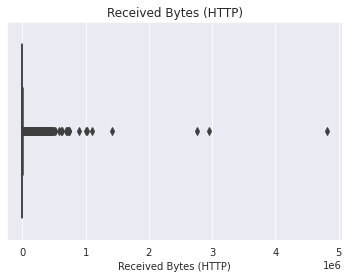

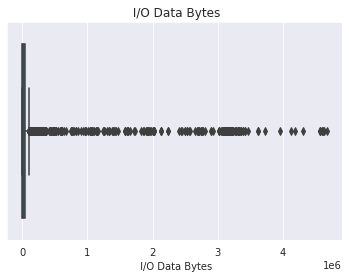

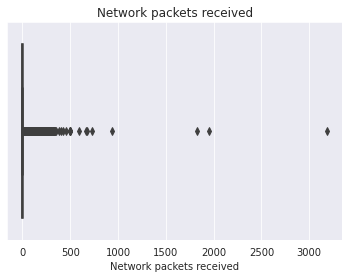

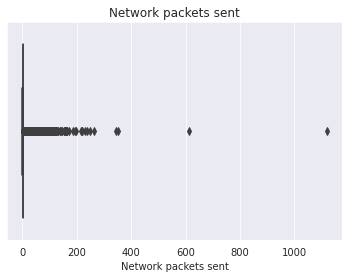

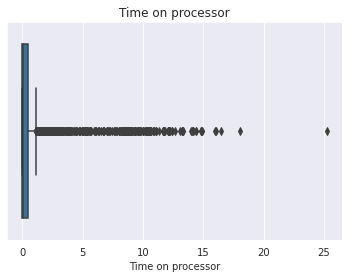

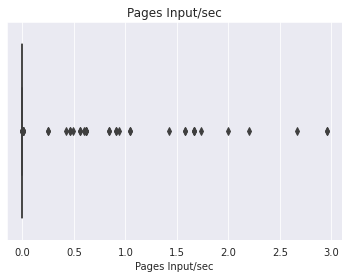

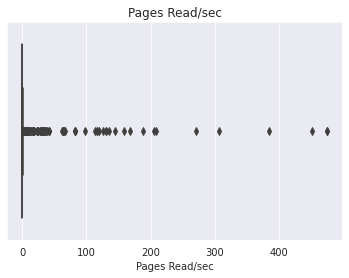

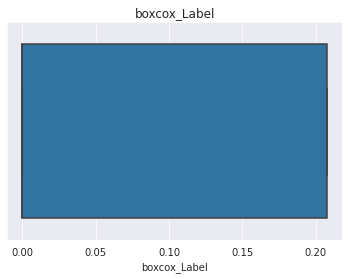

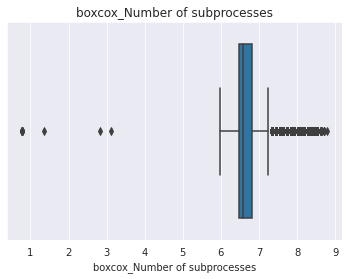

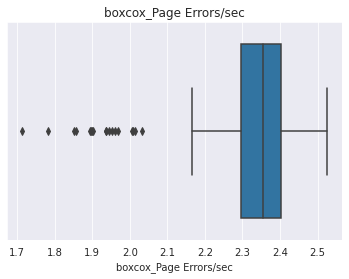

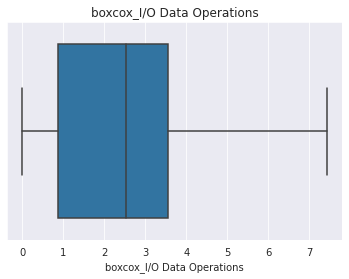

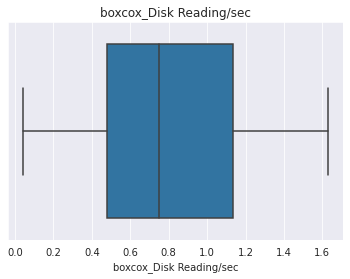

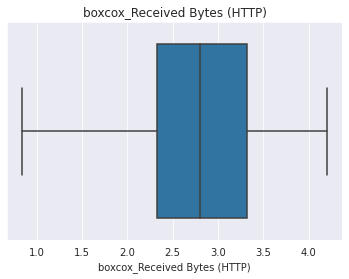

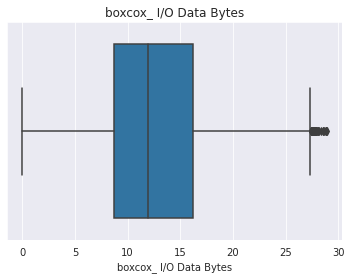

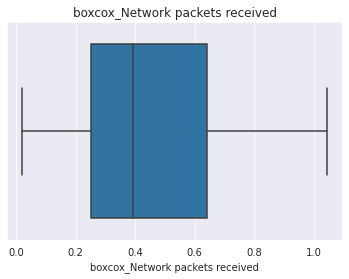

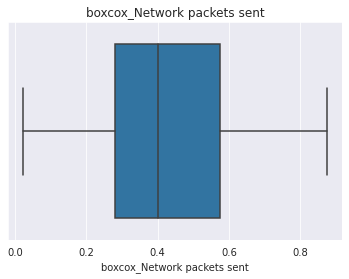

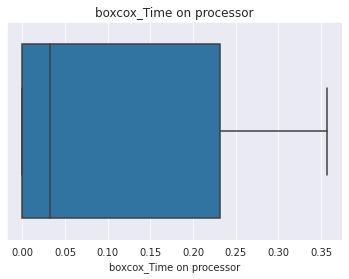

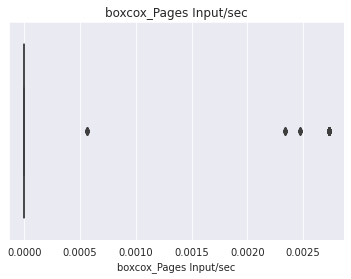

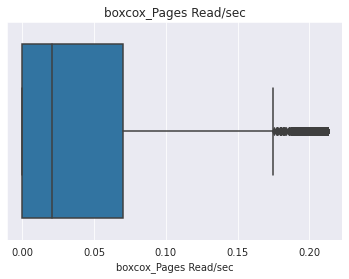

In [ ]:
# Create a box plot for each feature using Seaborn
for column in selected_features_df.columns:
    plt.figure()
    sns.boxplot(x=selected_features_df[column])
    plt.title(column)

# Show the plots
plt.show()

In [ ]:
threshold = 3.5  # Set the threshold for the modified z-score

for col in selected_features_df.columns:
    median = np.median(selected_features_df[col])
    mad = np.median(np.abs(selected_features_df[col] - median))
    modified_z_scores = 0.6745 * (selected_features_df[col] - median) / mad
    is_outlier = np.abs(modified_z_scores) > threshold
    selected_features_df = selected_features_df[~is_outlier]

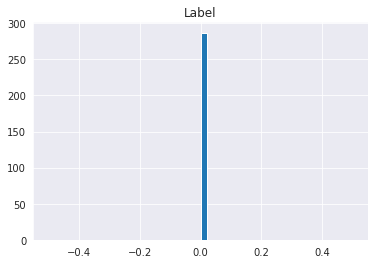

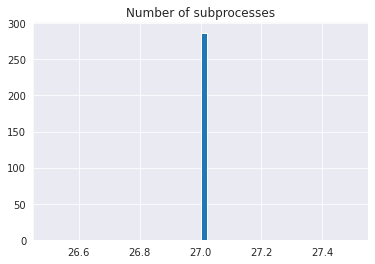

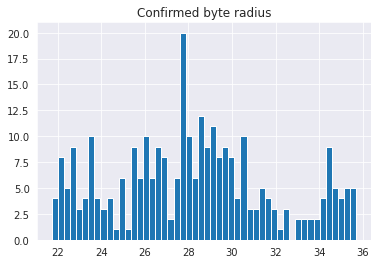

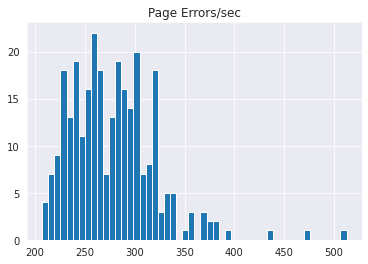

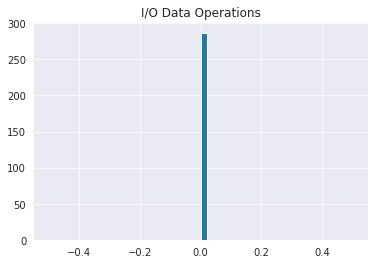

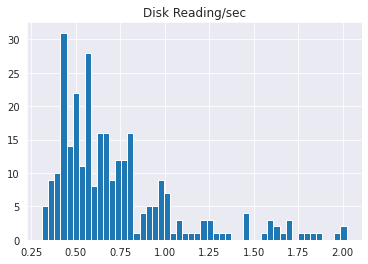

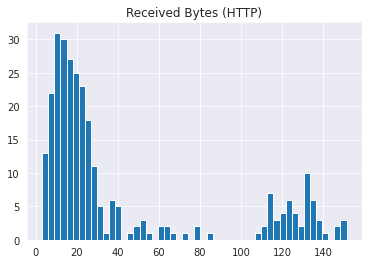

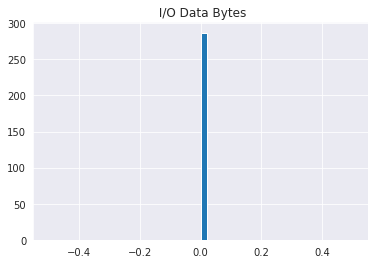

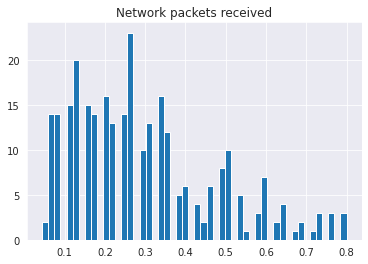

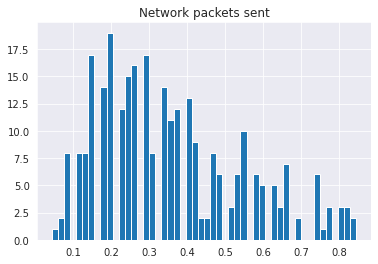

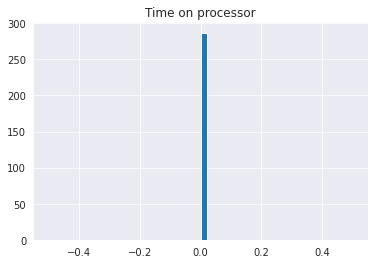

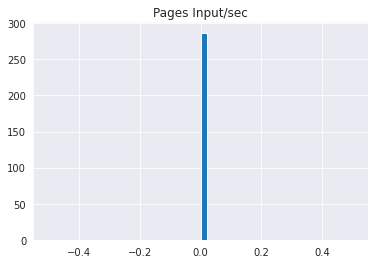

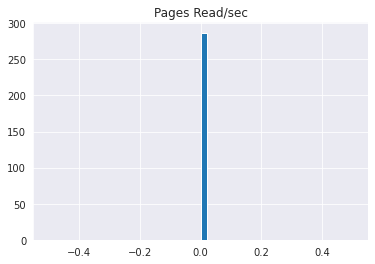

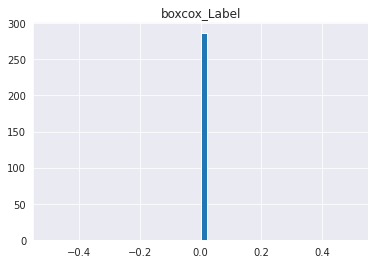

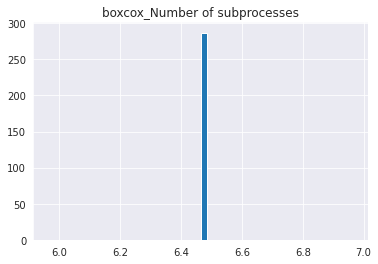

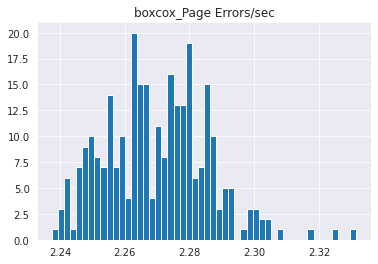

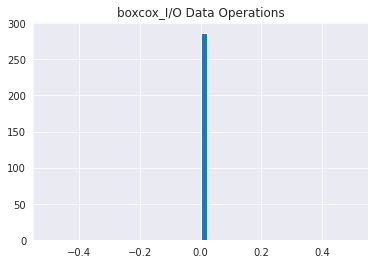

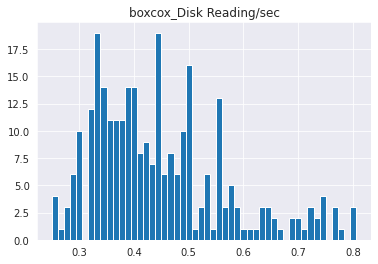

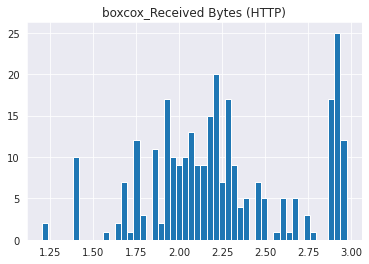

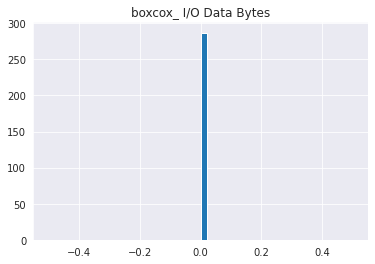

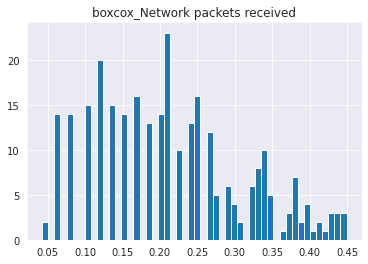

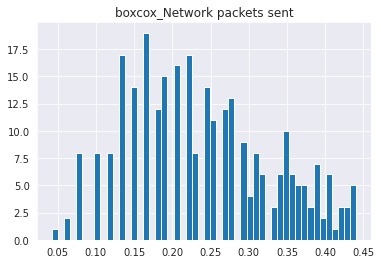

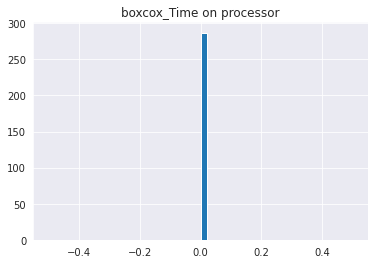

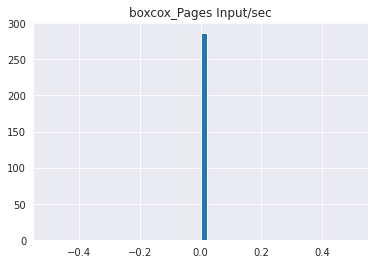

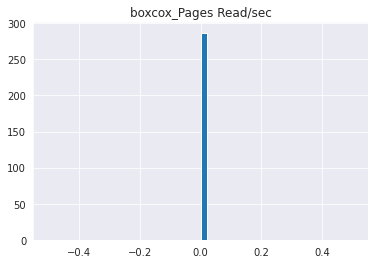

In [ ]:
for col in selected_features_df.columns:
    plt.hist(selected_features_df[col], bins=50)
    plt.title(col)
    plt.show()

In [ ]:
selected_features_df.columns

Index(['Label', 'Number of subprocesses', 'Confirmed byte radius',
       'Page Errors/sec', 'I/O Data Operations', 'Disk Reading/sec',
       'Received Bytes (HTTP)', ' I/O Data Bytes', 'Network packets received',
       'Network packets sent', 'Time on processor', 'Pages Input/sec',
       'Pages Read/sec', 'boxcox_Label', 'boxcox_Number of subprocesses',
       'boxcox_Page Errors/sec', 'boxcox_I/O Data Operations',
       'boxcox_Disk Reading/sec', 'boxcox_Received Bytes (HTTP)',
       'boxcox_ I/O Data Bytes', 'boxcox_Network packets received',
       'boxcox_Network packets sent', 'boxcox_Time on processor',
       'boxcox_Pages Input/sec', 'boxcox_Pages Read/sec'],
      dtype='object')

In [ ]:
selected_features_df.dtypes

Label                                int64
Number of subprocesses             float64
Confirmed byte radius              float64
Page Errors/sec                    float64
I/O Data Operations                float64
Disk Reading/sec                   float64
Received Bytes (HTTP)              float64
 I/O Data Bytes                    float64
Network packets received           float64
Network packets sent               float64
Time on processor                  float64
Pages Input/sec                    float64
Pages Read/sec                     float64
boxcox_Label                       float64
boxcox_Number of subprocesses      float64
boxcox_Page Errors/sec             float64
boxcox_I/O Data Operations         float64
boxcox_Disk Reading/sec            float64
boxcox_Received Bytes (HTTP)       float64
boxcox_ I/O Data Bytes             float64
boxcox_Network packets received    float64
boxcox_Network packets sent        float64
boxcox_Time on processor           float64
boxcox_Page

In [ ]:
from scipy.stats import boxcox

def preprocess_data(train_data, test_data, threshold=3.5):
    # Select only numerical columns
    numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
    
    # Apply Box-Cox transformation to skewed columns
    for col in numerical_cols:
        skewness = train_data[col].skew()
        if abs(skewness) > 0.5:
            train_data['boxcox_' + col], _ = boxcox(train_data[col] + 1)  # add 1 to avoid negative values
            test_data['boxcox_' + col], _ = boxcox(test_data[col] + 1)
    
    # Drop outliers using modified z-score
    for col in train_data.columns:
        if col.startswith('boxcox_'):  # use transformed columns
            median = train_data[col].median()
            mad = np.median(np.abs(train_data[col] - median))
            modified_z_scores = 0.6745 * (train_data[col] - median) / mad
            is_outlier = np.abs(modified_z_scores) > threshold
            train_data = train_data[~is_outlier]
            test_data = test_data[~is_outlier]
    
    return train_data, test_data


In [ ]:
train_data, test_data = preprocess_data(train, test)


KeyError: ignored

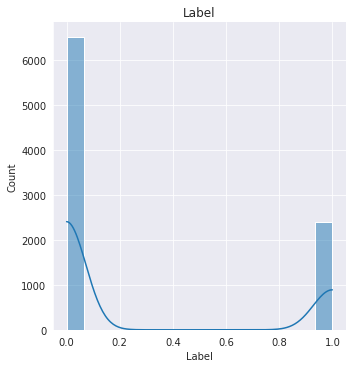

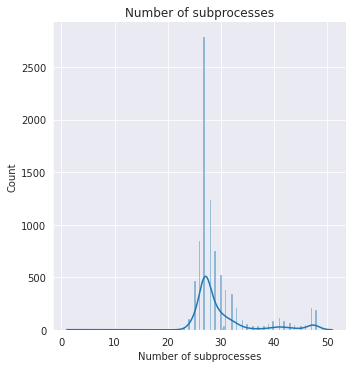

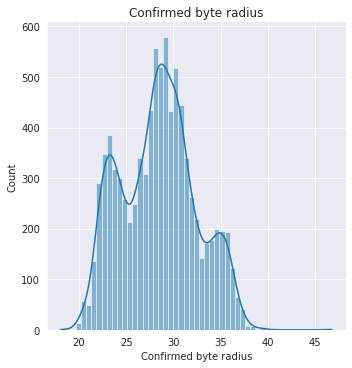

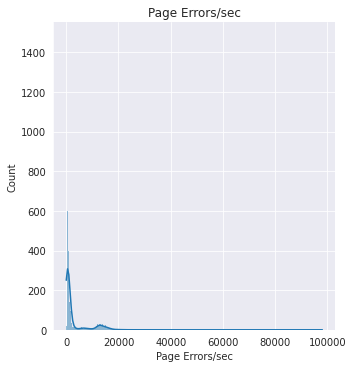

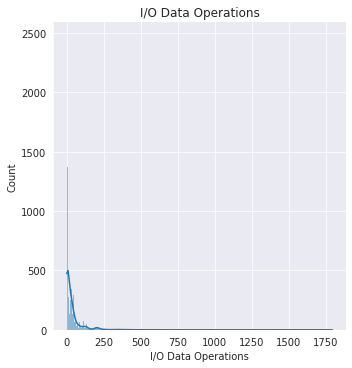

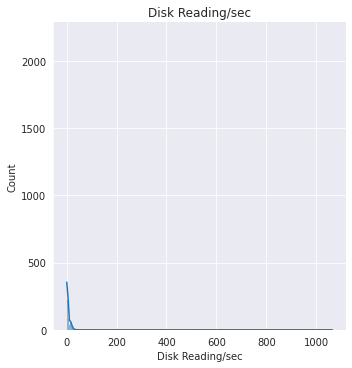

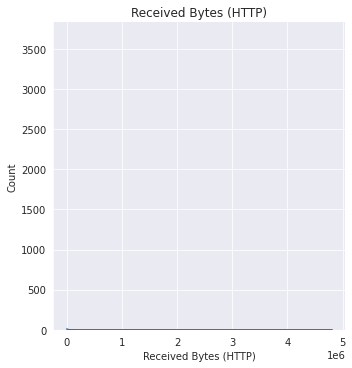

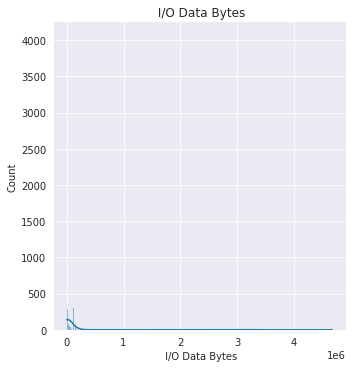

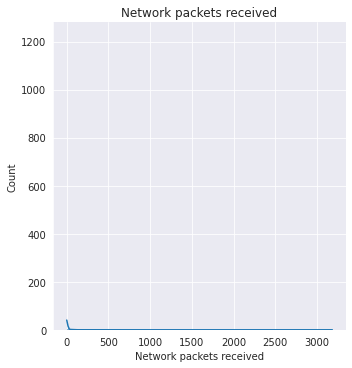

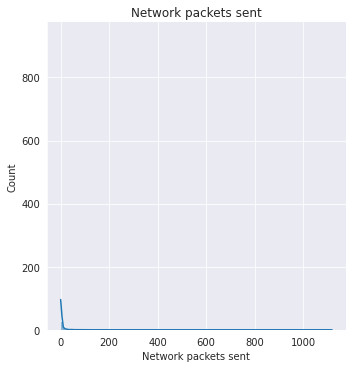

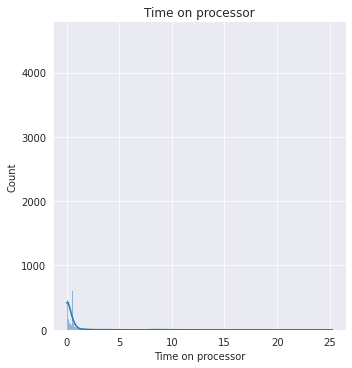

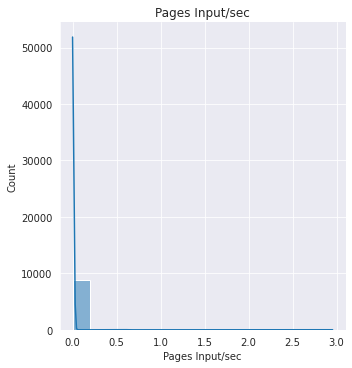

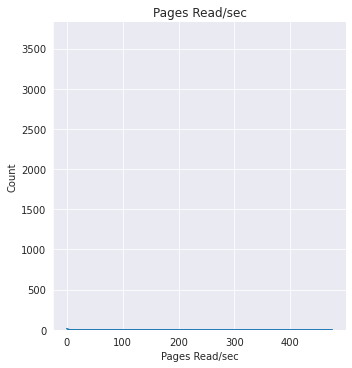

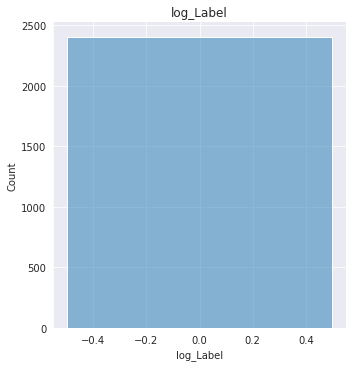

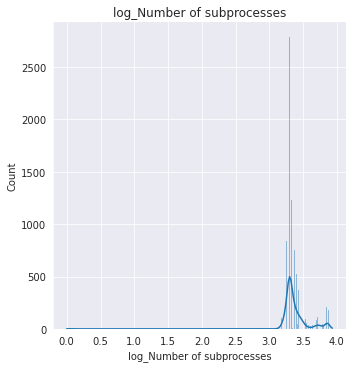

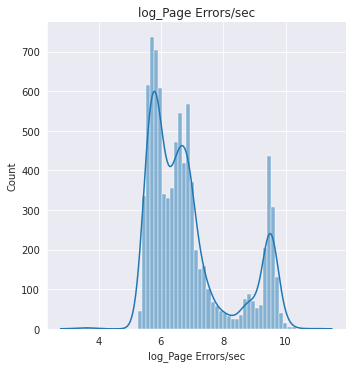

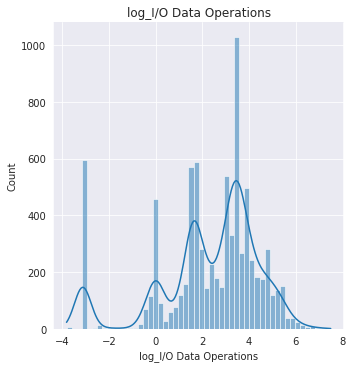

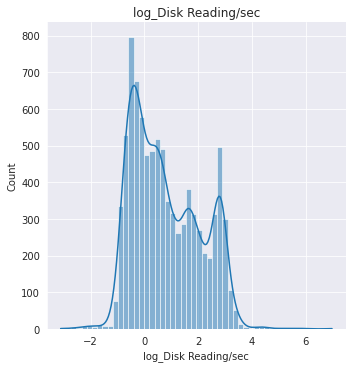

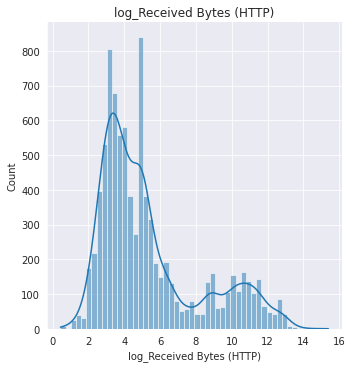

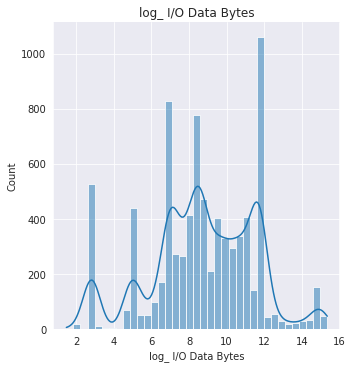

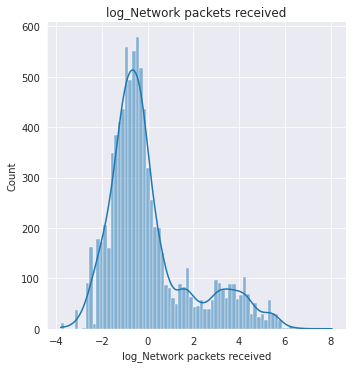

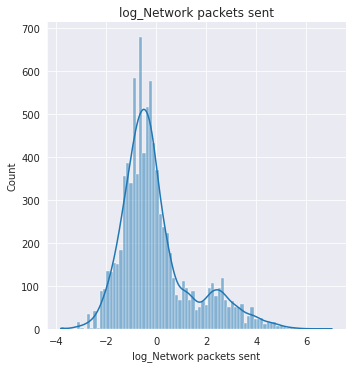

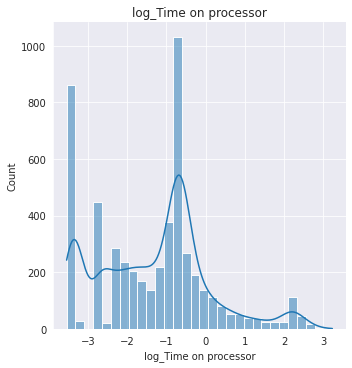

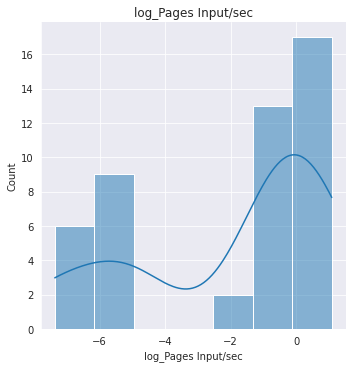

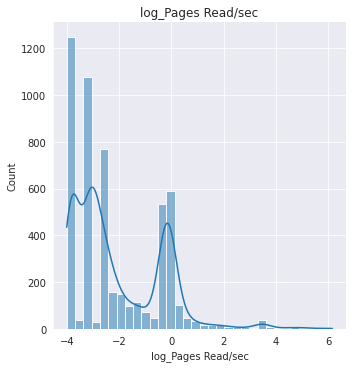

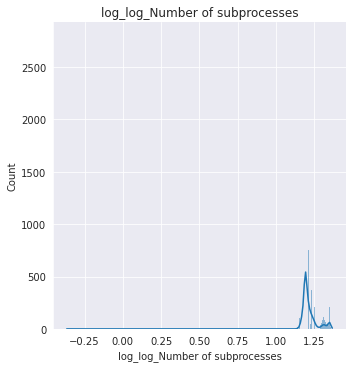

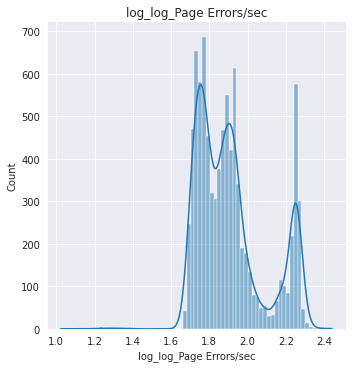

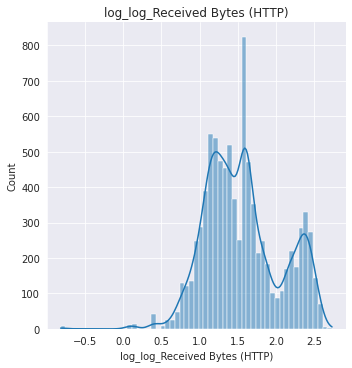

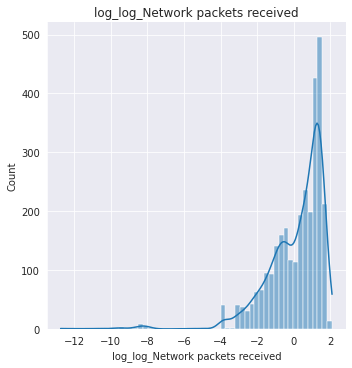

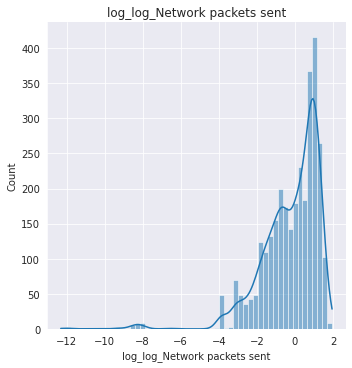

In [ ]:
for column in selected_features_df.columns:
    if selected_features_df[column].dtype != 'object':
        sns.displot(selected_features_df[column], kde=True)
        plt.title(column)
        plt.show()


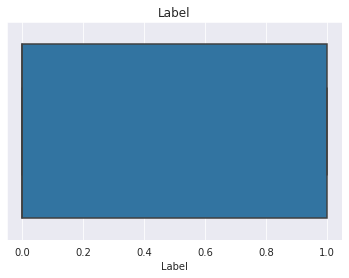

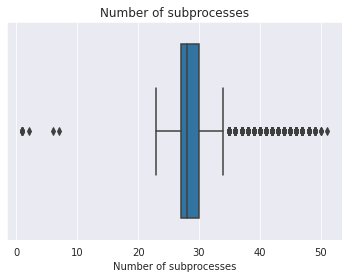

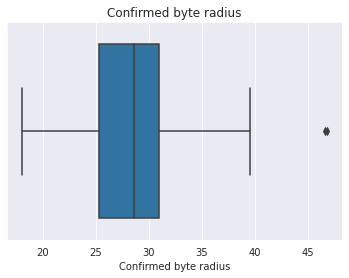

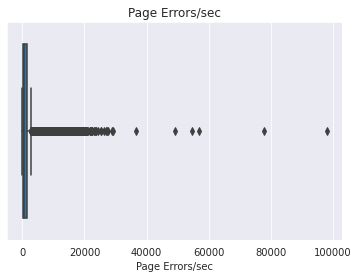

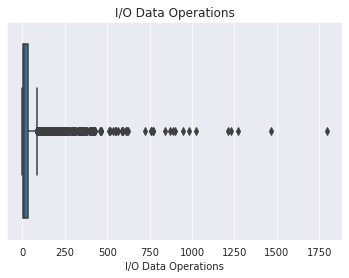

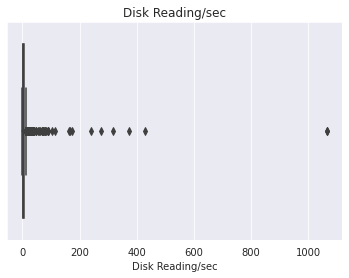

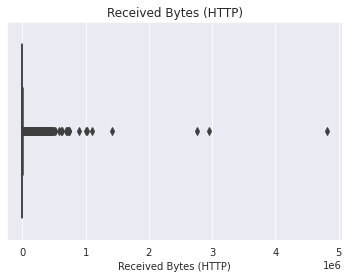

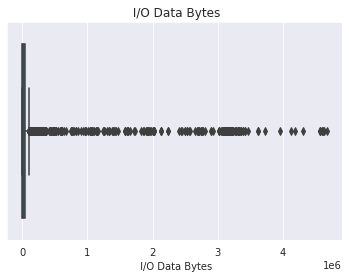

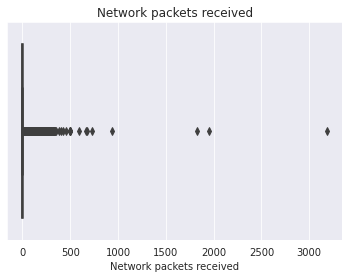

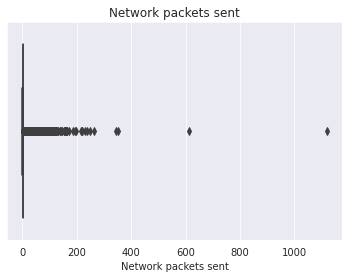

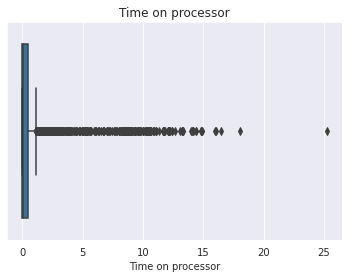

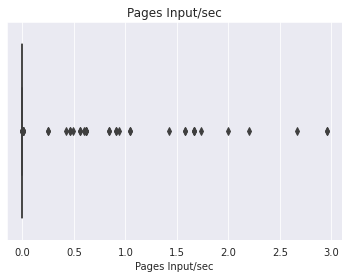

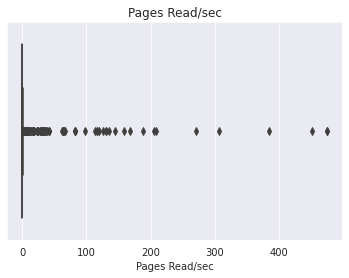

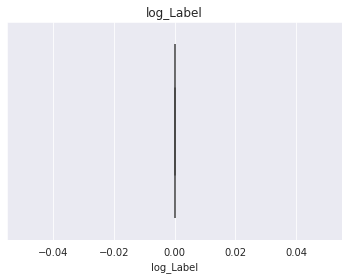

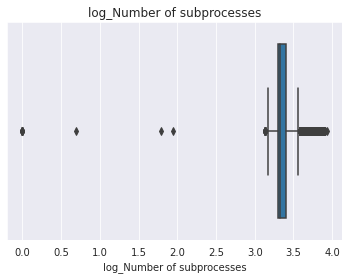

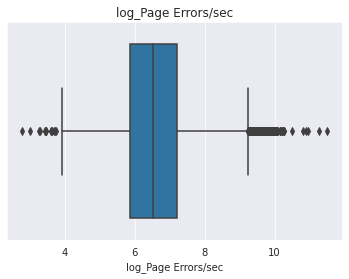

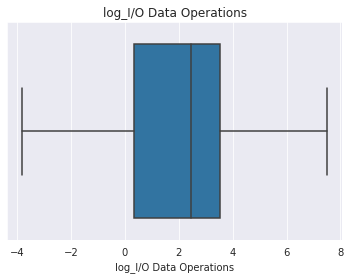

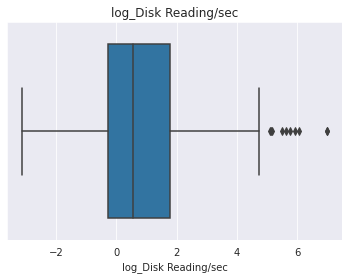

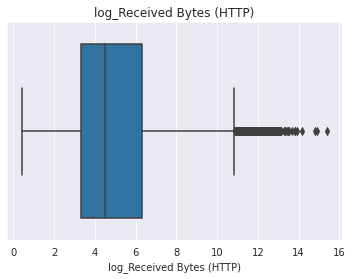

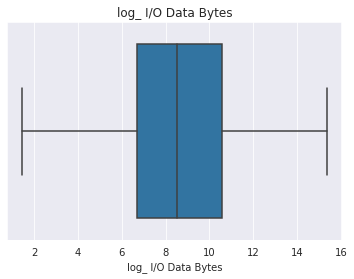

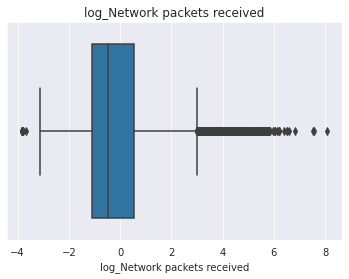

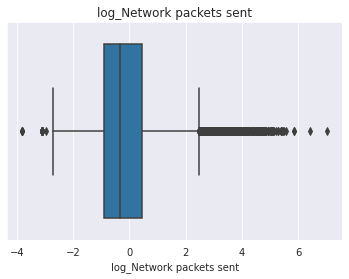

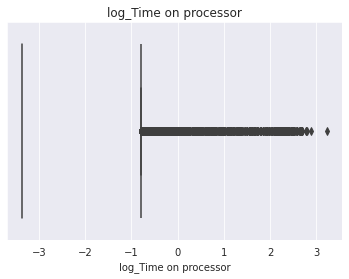

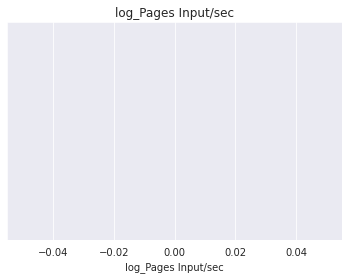

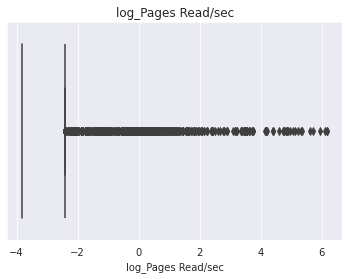

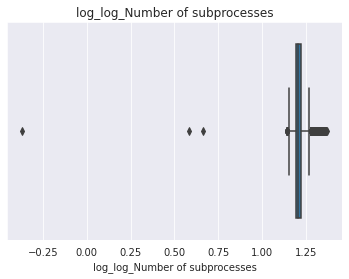

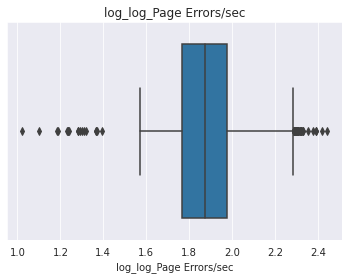

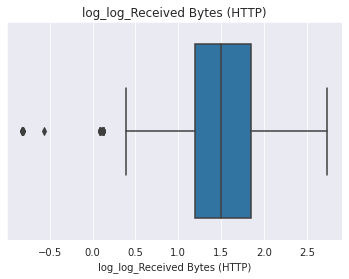

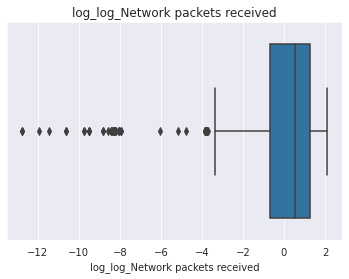

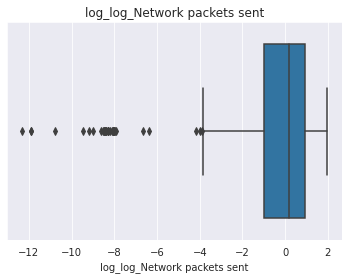

In [ ]:
# Create a box plot for each feature using Seaborn
for column in selected_features_df.columns:
    plt.figure()
    sns.boxplot(x=selected_features_df[column])
    plt.title(column)

# Show the plots
plt.show()

In [ ]:
# Loop through all columns in the dataset
for col in df.columns:

    # Check if the column is numerical
    if df[col].dtype in ['int64', 'float64']:

        # Compute skewness of the column
        skewness = df[col].skew()

        # Apply Box-Cox transformation if skewness is greater than 0.5
        if abs(skewness) > 0.5:
            df['boxcox_' + col], _ = boxcox(df[col] + 1)  # add 1 to avoid negative values

In [ ]:
selected_features_df.columns

Index(['Label', 'Number of subprocesses', 'Confirmed byte radius',
       'Page Errors/sec', 'I/O Data Operations', 'Disk Reading/sec',
       'Received Bytes (HTTP)', ' I/O Data Bytes', 'Network packets received',
       'Network packets sent', 'Time on processor', 'Pages Input/sec',
       'Pages Read/sec', 'log_Label', 'log_Number of subprocesses',
       'log_Page Errors/sec', 'log_I/O Data Operations',
       'log_Disk Reading/sec', 'log_Received Bytes (HTTP)',
       'log_ I/O Data Bytes', 'log_Network packets received',
       'log_Network packets sent', 'log_Time on processor',
       'log_Pages Input/sec', 'log_Pages Read/sec',
       'log_log_Number of subprocesses', 'log_log_Page Errors/sec',
       'log_log_Received Bytes (HTTP)', 'log_log_Network packets received',
       'log_log_Network packets sent'],
      dtype='object')

In [ ]:
z_scores = np.abs((selected_features_df - selected_features_df.mean()) / selected_features_df.std())

# Define a threshold z-score beyond which a value is considered an outlier
threshold = 3

# Drop rows that contain at least one outlier
selected_features_df = selected_features_df[(z_scores < threshold).all(axis=1)]

In [ ]:
#scale numerical features for logistic model
features = selected_features_df.drop(columns=['Label']).columns
target = 'Label'

# define standard scaler
scaler = StandardScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [ ]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.2,
                                                    random_state=SEED)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#to further handle imbalance
ros = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Initialize base classifiers
rf = RandomForestClassifier(n_estimators= 210, min_samples_split= 10, min_samples_leaf= 5, max_features='auto', max_depth= 410, bootstrap= False)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize meta-classifier
lr = LogisticRegression()

# Initialize stacking classifier
stacking = StackingClassifier(classifiers=[rf, gb, nb, knn], meta_classifier=lr)

# Train and evaluate stacking classifier using cross-validation
scores = cross_val_score(stacking, X_resampled, y_resampled, cv=5)

# Fit stacking classifier on entire training set
stacking.fit(X_resampled, y_resampled)

# Predict on test set and evaluate performance using classification report
stacking_preds = stacking.predict(X_test)
print(classification_report(y_test, stacking_preds))


TypeError: ignored

In [ ]:
#make predictions on test set
test['Target'] = stacking.predict(test[features])

In [ ]:
sub = test[['ID', 'Target']]

In [ ]:
sub.head()

In [ ]:
sub.to_csv('muhire3_crypto.csv', index=False)